# Visualisation

There are several tools to visualise the data. Two common tools are:

*   matplotlib
    
    A comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

    https://matplotlib.org/

*   seaborn

    A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

    https://seaborn.pydata.org/

  
For this tutorial, we will use Pandas, although the data can be of any type


## Loading pandas

Since Pandas is not part of the Python standard library, we have to first tell Python to load (i.e., import) the library

In [74]:
import pandas as pd

## Loading a data set

With the library loaded we can use the read_csv() function to load a CSV data file

For this tutorial, we will use the data stored at: https://github.com/jennybc/gapminder/blob/main/data-raw/04_gap-merged.tsv

In [75]:
'''
Note: If you are using Google Colab, then the data file must be uploaded first
        On the other hand, the data file-path must be doble check
'''

df  = pd.read_csv(filepath_or_buffer = '/content/04_gap-merged.tsv', sep='\t')
# print out the data
print(df)

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
3307     Zimbabwe    Africa  1987   62.351   9216418  706.157306
3308     Zimbabwe    Africa  1992   60.377  10704340  693.420786
3309     Zimbabwe    Africa  1997   46.809  11404948  792.449960
3310     Zimbabwe    Africa  2002   39.989  11926563  672.038623
3311     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[3312 rows x 6 columns]


## Matplotlib

Since Matplotlib is not part of the Python standard library, we have to first tell Python to load (i.e., import) the library

In [3]:
import matplotlib.pyplot as plt

### Basic plots

The documentation is at https://matplotlib.org/stable/plot_types/basic/index.html

The types of plots available are:

*   plot (line plot)
*   scatter
*   bar
*   stem (draws lines perpendicular to a baseline at each location locs from the baseline to heads, and places a marker there)
*   step
*   fill_between (Fill the area between two horizontal curves)
*   stackplot (Draw a stacked area plot)

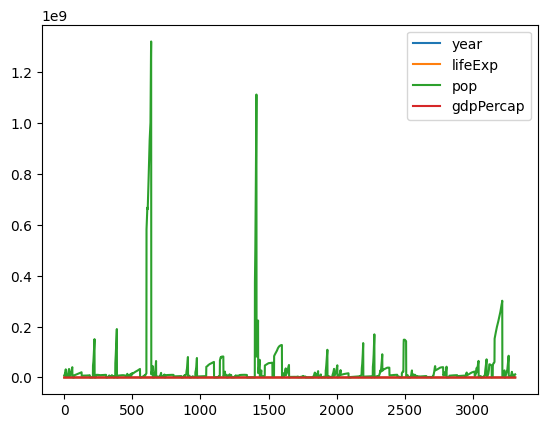

In [4]:
# use the .plot() DataFrame method
df.plot()

'''
Since we are using Colab, the plot is automatically displayed
If we use it in local form, then we need to call the show() method to display it
'''
# show the plot
plt.show()

### A two column plot

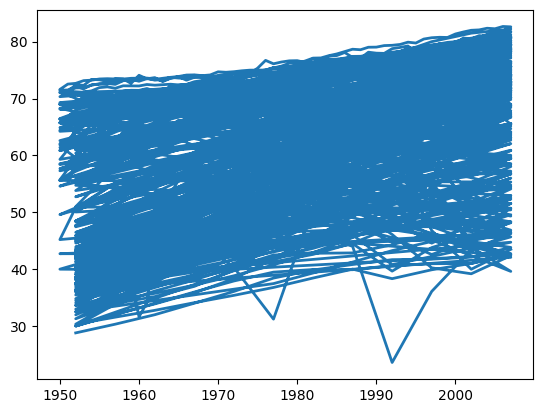

In [5]:
x = df['year']
y = df['lifeExp']

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.show()

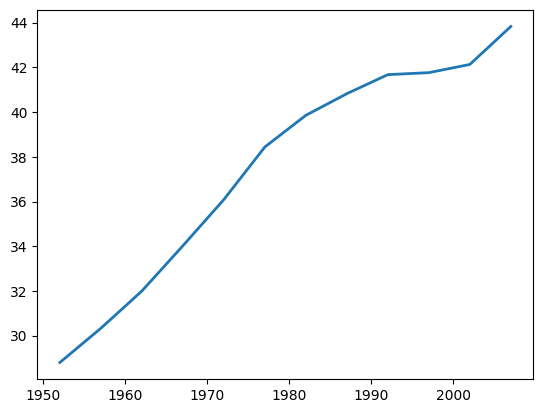

In [6]:
x = df.loc[df['country'] == 'Afghanistan', 'year']
y = df.loc[df['country'] == 'Afghanistan', 'lifeExp']

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.show()

### Adding labels and title

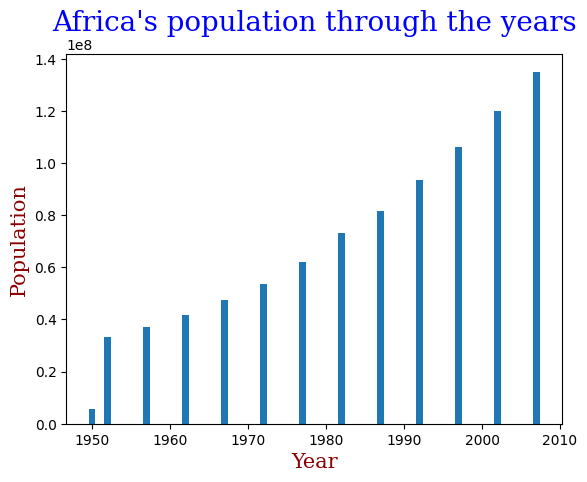

In [7]:
x = df.loc[df['continent'] == 'Africa', 'year']
y = df.loc[df['continent'] == 'Africa', 'pop']

# plot
fig, ax = plt.subplots()

ax.bar(x, y, linewidth=2.0)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Africa's population through the years", fontdict = font1)

plt.xlabel("Year", fontdict = font2)
plt.ylabel("Population", fontdict = font2)

plt.show()

### Statistics plots

The documentation is at https://matplotlib.org/stable/plot_types/stats/index.html

The types of plots available are:

*   hist (histogram)
*   boxplot (box and whisker plot)
*   errorbar (plot y versus x as lines and/or markers with attached errorbars)
*   violinplot
*   eventplot (plot identical parallel lines at the given positions)
*   hist2d (A 2D histogram plot)
*   hexbin (2D hexagonal binning plot of points x, y)
*   pie

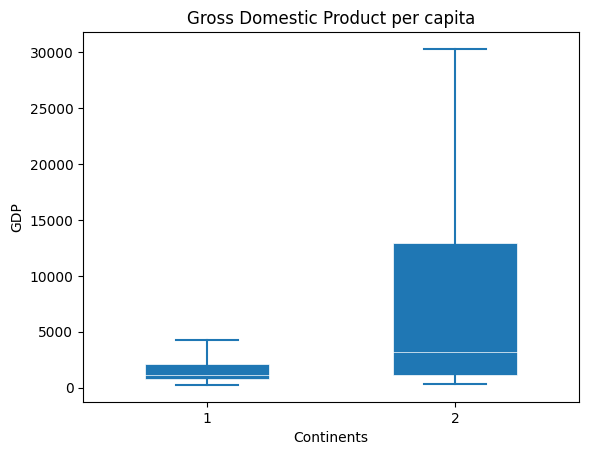

In [21]:
from numpy import True_
x = [df.loc[df['continent'] == 'Africa', 'gdpPercap'],df.loc[df['continent'] == 'Asia', 'gdpPercap']]

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(x, widths=0.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

plt.title("Gross Domestic Product per capita")

plt.xlabel("Continents")
plt.ylabel("GDP")

plt.show()

## Seaborn

Since Seaborn is not part of the Python standard library, we have to first tell Python to load (i.e., import) the library

In [28]:
import seaborn as sns

### A two column plot

<ipython-input-35-5346b5b84cf9>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(


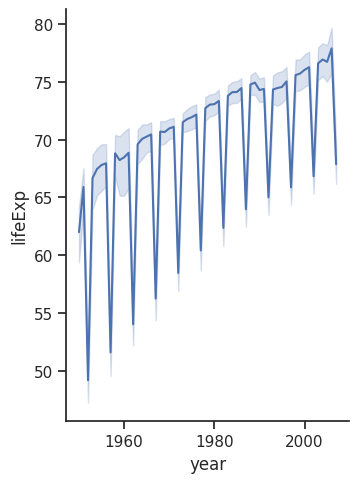

In [35]:
sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=df,
    x="year", y="lifeExp", 
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False)
)

### Adding lables and title

Text(0, 0.5, 'Population')

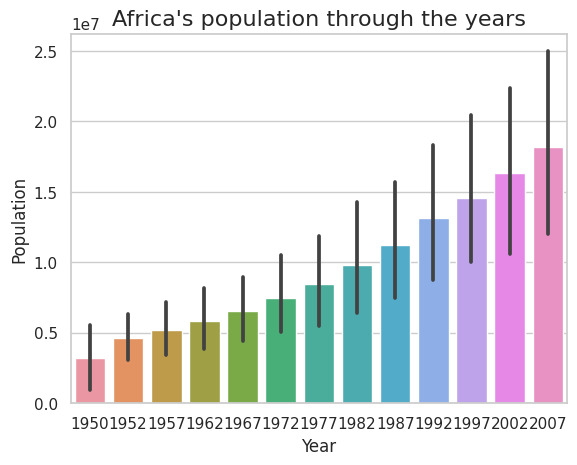

In [47]:
x = df.loc[df['continent'] == 'Africa', 'year']
y = df.loc[df['continent'] == 'Africa', 'pop']

sns.barplot(x=x, y=y)

plt.title("Africa's population through the years", fontsize=16)

plt.xlabel("Year")
plt.ylabel("Population")

### Statistics plots

<ipython-input-148-4985991fb07b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = x.pivot('year','lifeExp','gdpPercap')


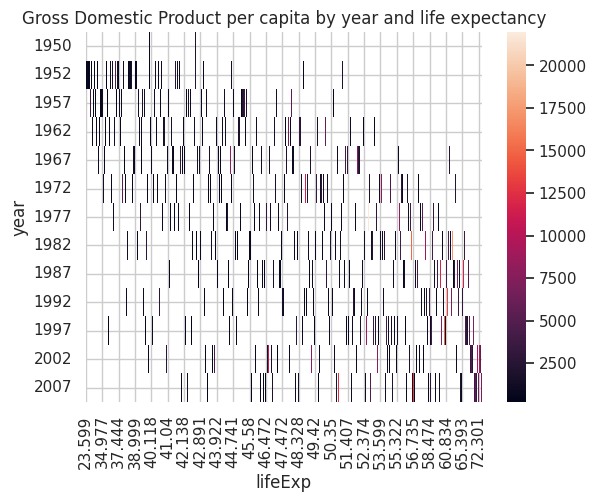

In [148]:
x = df.loc[df['continent'] == 'Africa', ['gdpPercap', 'year', 'lifeExp']]

data = x.pivot('year','lifeExp','gdpPercap')

sns.heatmap(data, annot=False)

plt.title("Gross Domestic Product per capita by year and life expectancy")

plt.show()

## Pandas plot method

As an alternative, we can use the pandas methods to plot directly over a datapframe.

The documentation is available here https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

The plots we have acces are:

*   plot
*   area
*   bar
*   barh (horizontal bar plot)
*   box (boxplot)
*   density
*   hexbin (hexagonal binning plot)
*   hist (histogram)
*   kde (Kernel Density Estimate plot using Gaussian kernels)
*   line
*   pie
*   scatter






<Axes: >

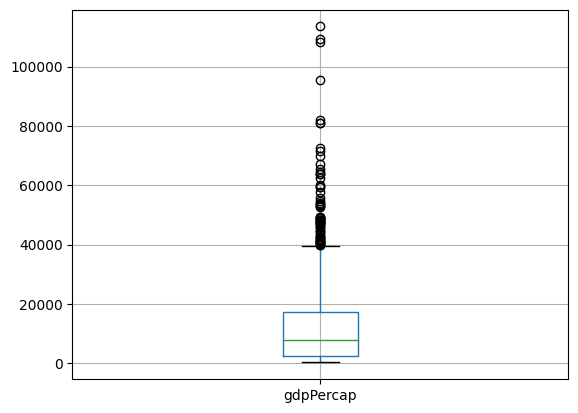

In [24]:
boxplot = df.boxplot(column=['gdpPercap'])
boxplot